# Milestone 1: Download and prepare data

In [ ]:
!git clone https://github.com/bhavanachem/RedditBias.git

Cloning into 'RedditBias'...
remote: Enumerating objects: 1060, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1060 (delta 0), reused 0 (delta 0), pack-reused 1057 (from 1)
Receiving objects: 100% (1060/1060), 34.70 MiB | 14.18 MiB/s, done.
Resolving deltas: 100% (699/699), done.


In [ ]:
!pip install pandas scikit-learn -q

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset, Dataset

In [ ]:
file1 = "RedditBias/data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv"
file2 = "RedditBias/data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv"
file3 = "RedditBias/data/race/reddit_comments_race_black_processed_phrase_annotated.csv"
file4 = "RedditBias/data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv"
file5 = "RedditBias/data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv"

print("Loading individual datasets...")
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4, encoding='latin-1')
df5 = pd.read_csv(file5)

print("Working with: ")
print(file1)
print(file2)
print(file3)
print(file4)
print(file5)

Loading individual datasets...
Working with: 
RedditBias/data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv
RedditBias/data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv
RedditBias/data/race/reddit_comments_race_black_processed_phrase_annotated.csv
RedditBias/data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv
RedditBias/data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv


In [ ]:
# Add source tracking to each dataframe
df1['bias_type'] = 'gender'
df2['bias_type'] = 'orientation'
df3['bias_type'] = 'race'
df4['bias_type'] = 'religion1'
df5['bias_type'] = 'religion2'

print('bias_type distribution:')
print(f'Gender: {len(df1)} samples')
print(f'Orientation: {len(df2)} samples')
print(f'Race: {len(df3)} samples')
print(f'Religion1: {len(df4)} samples')
print(f'Religion2: {len(df5)} samples')


bias_type distribution:
Gender: 3000 samples
Orientation: 7993 samples
Race: 3000 samples
Religion1: 3554 samples
Religion2: 10584 samples


In [ ]:
# Combine datasets
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

/tmp/ipython-input-424877818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')


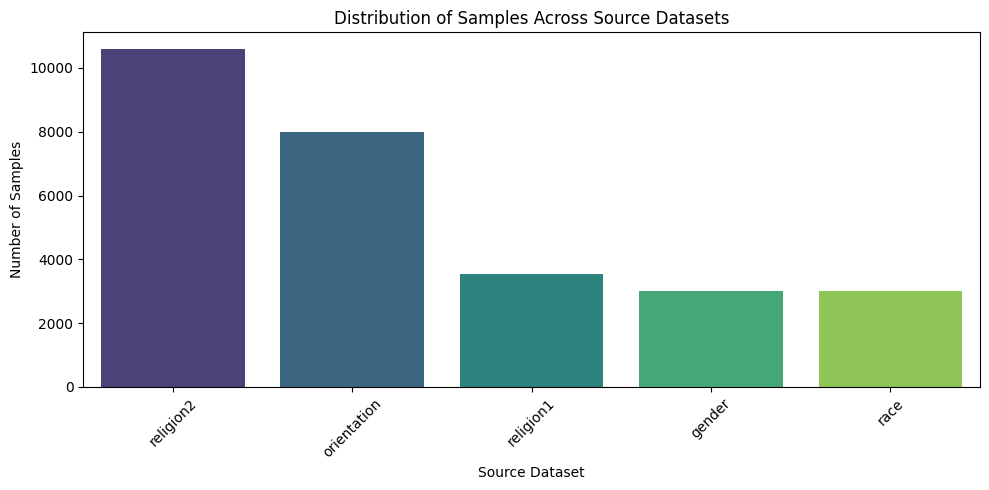


bias_type distribution:
bias_type
religion2      10584
orientation     7993
religion1       3554
gender          3000
race            3000
Name: count, dtype: int64


In [ ]:
# Visualize source distribution
plt.figure(figsize=(10, 5))
source_counts = df['bias_type'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Distribution of Samples Across Source Datasets')
plt.xlabel('Source Dataset')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\nbias_type distribution:')
print(source_counts)


In [ ]:
df

,attribute_in_window,comment,phrase,bias_sent,bias_phrase,Unnamed: 5,bias_type,id
0,True,im sorry this is happening for you. at least y...,least you know whats happening now. narcissist...,0,0.0,NaN,gender,NaN
1,True,their mothers are in on the joke art project,their mothers are in on the joke art project,1,1.0,NaN,gender,NaN
2,True,i feel like this is some deep artistic dance t...,artistic dance thats trying to highlight how m...,0,0.0,NaN,gender,NaN
3,True,or biology. over protective and smothering mot...,or biology. over protective and smothering mot...,0,0.0,NaN,gender,NaN
4,True,writing poetry to a girl is the fastest way to...,writing poetry to a girl is the fastest way to...,0,0.0,NaN,gender,NaN
...,...,...,...,...,...,...,...,...
28126,True,false comparison not every muslim is violent. ...,false comparison not every muslim is violent. ...,NaN,NaN,NaN,religion2,dlre79o
28127,True,if every nazi is violent because they believe ...,believe in a violent ideology then every musli...,NaN,NaN,NaN,religion2,dlreadd
28128,True,guys i dont think they know just how stupid th...,how stupid they are not every muslim is viole...,NaN,NaN,NaN,religion2,dlreflm
28129,True,not every muslim is violent not every german i...,not every muslim is violent not every german i...,NaN,NaN,NaN,religion2,disuk3y


In [ ]:
# Define text and label columns
TEXT_COLUMN = 'comment'  # The main text we'll classify
LABEL_COLUMN = 'bias_sent'  # Using sentence-level bias as our target
BIAS_TYPE_COLUMN = 'bias_type'
print("Using", TEXT_COLUMN, "as input text")
print("Using", LABEL_COLUMN, "as target label")

Using comment as input text
Using bias_sent as target label


In [ ]:
# Select only the columns we need
new_df = df[[TEXT_COLUMN, LABEL_COLUMN, BIAS_TYPE_COLUMN]].copy()
new_df

,comment,bias_sent,bias_type
0,im sorry this is happening for you. at least y...,0,gender
1,their mothers are in on the joke art project,1,gender
2,i feel like this is some deep artistic dance t...,0,gender
3,or biology. over protective and smothering mot...,0,gender
4,writing poetry to a girl is the fastest way to...,0,gender
...,...,...,...
28126,false comparison not every muslim is violent. ...,NaN,religion2
28127,if every nazi is violent because they believe ...,NaN,religion2
28128,guys i dont think they know just how stupid th...,NaN,religion2
28129,not every muslim is violent not every german i...,NaN,religion2


In [ ]:
# Convert the column to numeric, coercing errors will turn non-numeric values into NaN
new_df[LABEL_COLUMN] = pd.to_numeric(new_df[LABEL_COLUMN], errors='coerce')
print(new_df[LABEL_COLUMN].value_counts().sort_index())

bias_sent
0.0    4900
1.0    6592
2.0      24
Name: count, dtype: int64


In [ ]:
new_df.dtypes

,0
comment,object
bias_sent,float64
bias_type,object


In [ ]:
# split into labeled and unlabeled data columns
df_labeled = new_df.dropna(subset=[LABEL_COLUMN])
df_unlabeled = new_df[new_df[LABEL_COLUMN].isna()]

In [ ]:
print(df_labeled[LABEL_COLUMN].value_counts().sort_index())

bias_sent
0.0    4900
1.0    6592
2.0      24
Name: count, dtype: int64


In [ ]:
# Ensure labels are integers and filter for only binary classes (0 or 1)
df_labeled[LABEL_COLUMN] = df_labeled[LABEL_COLUMN].astype(int)
df_labeled = df_labeled[df_labeled[LABEL_COLUMN].isin([0, 1])].copy()

print(f"labeled dataset size: {len(df_labeled)}")
print(f"label counts:\n{df_labeled[LABEL_COLUMN].value_counts().sort_index()}")

labeled dataset size: 11492
label counts:
bias_sent
0    4900
1    6592
Name: count, dtype: int64


/tmp/ipython-input-440744501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled[LABEL_COLUMN] = df_labeled[LABEL_COLUMN].astype(int)


In [ ]:
df_labeled[TEXT_COLUMN] = df_labeled[TEXT_COLUMN].astype("string")
df_labeled = df_labeled[df_labeled[TEXT_COLUMN].str.len() > 2].reset_index(drop=True)

df_labeled[BIAS_TYPE_COLUMN] = df_labeled[BIAS_TYPE_COLUMN].astype("string")
df_labeled = df_labeled[df_labeled[BIAS_TYPE_COLUMN].str.len() > 2].reset_index(drop=True)

df_labeled.dtypes

,0
comment,string[python]
bias_sent,int64
bias_type,string[python]


In [ ]:
df_labeled.to_csv("redditbias_labeled.csv", index=False)
df_unlabeled.to_csv("redditbias_unlabeled.csv", index=False)


--- Visualizing Label Distribution ---


/tmp/ipython-input-1619385514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=LABEL_COLUMN, data=df_labeled, palette='viridis')


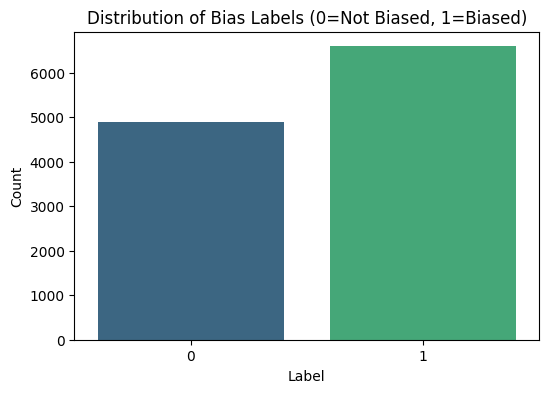

In [ ]:
# Visualization Snippet 1: Label Distribution
# Bar chart showing the count of 0s and 1s in the dataset
print("\n--- Visualizing Label Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x=LABEL_COLUMN, data=df_labeled, palette='viridis')
plt.title(f'Distribution of Bias Labels (0=Not Biased, 1=Biased)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
print("First 10 rows: ")
df_labeled.head(10)

First 10 rows: 


,comment,bias_sent,bias_type
0,im sorry this is happening for you. at least y...,0,gender
1,their mothers are in on the joke art project,1,gender
2,i feel like this is some deep artistic dance t...,0,gender
3,or biology. over protective and smothering mot...,0,gender
4,writing poetry to a girl is the fastest way to...,0,gender
5,your wife is sexual poetry in motion,0,gender
6,top banana horse girl is like poetry,0,gender
7,my wife is a poet and loves poetry. it is amaz...,1,gender
8,this girl is pure poetry.,0,gender
9,not to be confused with the one where the girl...,1,gender


In [ ]:
# Print the shape and total number of samples in the combined dataset
print("Dataset shape: ", df_labeled.shape)
print("Total samples: ", len(df_labeled))

Dataset shape:  (11492, 3)
Total samples:  11492


In [ ]:
print("Column names: ", df_labeled.columns.tolist())
print("Column data types: ", df_labeled.dtypes)
df_labeled['stratify_col'] = df_labeled[LABEL_COLUMN].astype(str) + '_' + df_labeled['bias_type']


Column names:  ['comment', 'bias_sent', 'bias_type']
Column data types:  comment      string[python]
bias_sent             int64
bias_type    string[python]
dtype: object


In [ ]:
# Create initial 80% train, 20% test/val split
train_df, val_df = train_test_split(
    df_labeled,
    test_size=0.2,
    random_state=42,
    stratify=df_labeled['stratify_col']  # Stratify to keep label distribution
)


In [ ]:
# Save the splits
train_df.to_csv("train.csv", index=False)
val_df.to_csv("validation.csv", index=False)

print("Data splitting complete.")
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

Data splitting complete.
Train set size: 9193
Validation set size: 2299


In [ ]:
# VERIFY STRATIFIED SPLIT
# ========================================
print("\n=== Stratification Verification ===")
print("\nOriginal dataset distribution:")
print(df_labeled['stratify_col'].value_counts().sort_index())
print(f"\nOriginal proportions:")
print(df_labeled['stratify_col'].value_counts(normalize=True).sort_index())

print("\n" + "="*50)
print("\nTraining set distribution:")
print(train_df['stratify_col'].value_counts().sort_index())
print(f"\nTraining proportions:")
print(train_df['stratify_col'].value_counts(normalize=True).sort_index())

print("\n" + "="*50)
print("\nValidation set distribution:")
print(val_df['stratify_col'].value_counts().sort_index())
print(f"\nValidation proportions:")
print(val_df['stratify_col'].value_counts(normalize=True).sort_index())

print("\n" + "="*50)
print("\n✓ Stratification is working correctly if proportions are similar!")


=== Stratification Verification ===

Original dataset distribution:
stratify_col
0_gender          943
0_orientation     864
0_race           1438
0_religion1      1012
0_religion2       643
1_gender         2033
1_orientation    1119
1_race           1182
1_religion1      1099
1_religion2      1159
Name: count, dtype: Int64

Original proportions:
stratify_col
0_gender         0.082057
0_orientation    0.075183
0_race           0.125131
0_religion1      0.088061
0_religion2      0.055952
1_gender         0.176906
1_orientation    0.097372
1_race           0.102854
1_religion1      0.095632
1_religion2      0.100853
Name: proportion, dtype: Float64


Training set distribution:
stratify_col
0_gender          754
0_orientation     691
0_race           1150
0_religion1       810
0_religion2       515
1_gender         1626
1_orientation     895
1_race            946
1_religion1       879
1_religion2       927
Name: count, dtype: Int64

Training proportions:
stratify_col
0_gender         0.

# Milestone 2: Finetune base model


In [ ]:
!pip install transformers datasets evaluate accelerate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers datasets evaluate accelerate optuna -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 17.6 MB/s eta 0:00:00


In [ ]:
# GPU SETUP AND VERIFICATION (T4 GPU)

import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"Number of GPUs: {torch.cuda.device_count()}")

    # Set optimal settings for T4 GPU
    torch.backends.cudnn.benchmark = True
    print("\n✓ GPU optimization enabled!")
else:
    print("\n⚠️ WARNING: GPU not available. Training will be VERY slow!")
    print("To enable GPU: Runtime -> Change runtime type -> T4 GPU")


PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA version: 12.6
GPU Device: Tesla T4
GPU Memory: 15.83 GB
Number of GPUs: 1

✓ GPU optimization enabled!


In [ ]:
import torch
import numpy as np
import evaluate
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
MODEL_NAME_BERT = "google-bert/bert-base-uncased"

In [ ]:
# 0 = not biased, 1 = biased)
NUM_LABELS = 2

In [ ]:
# 1. Load the data splits
print("Loading data splits...")
data_files = {
    "train": "train.csv",
    "validation": "validation.csv",
}

# Load from file and rename the target column
raw_datasets = load_dataset('csv', data_files=data_files)
raw_datasets = raw_datasets.rename_column(LABEL_COLUMN, "labels")

Loading data splits...


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
# 2. Load Tokenizer
print(f"Loading tokenizer for {MODEL_NAME_BERT}...")
tokenizer_bert = AutoTokenizer.from_pretrained(MODEL_NAME_BERT)

Loading tokenizer for google-bert/bert-base-uncased...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
# 3. Define Preprocessing Function (Tokenization)
def tokenize_function_bert(examples):
    return tokenizer_bert(
        examples[TEXT_COLUMN],
        padding='max_length',
        truncation=True,
        max_length=128
    )

In [ ]:
# 4. Apply Tokenization
print("Tokenizing datasets...")
# We use .map() to apply the tokenization to the entire dataset
tokenized_datasets_bert = raw_datasets.map(tokenize_function_bert, batched=True)

Tokenizing datasets...


Map:   0%|          | 0/9193 [00:00<?, ? examples/s]

Map:   0%|          | 0/2299 [00:00<?, ? examples/s]

In [ ]:
# 5. Load the Model
print(f"Loading model {MODEL_NAME_BERT}...")
model_bert = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME_BERT,
    num_labels=NUM_LABELS
)

Loading model google-bert/bert-base-uncased...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 6. Define Evaluation Metrics
# We use accuracy as a simple metric.
metric_accuracy = evaluate.load("accuracy")

def compute_metrics_bert(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric_accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# 7. Define Training Arguments
training_args_bert = TrainingArguments(
    output_dir="./results_bert",
    eval_strategy="epoch",
    logging_steps=100,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

In [ ]:
# 8. Initialize the Data Collator
print("Initializing Data Collator for dynamic padding...")
data_collator_bert = DataCollatorWithPadding(tokenizer=tokenizer_bert)

Initializing Data Collator for dynamic padding...


In [ ]:
# 9. Initialize the HuggingFace Trainer
# This class handles all the training and evaluation logic.
trainer_bert = Trainer(
    model=model_bert,
    args=training_args_bert,
    train_dataset=tokenized_datasets_bert["train"],
    eval_dataset=tokenized_datasets_bert["validation"],
    tokenizer=tokenizer_bert,
    data_collator=data_collator_bert,
    compute_metrics=compute_metrics_bert,
)

/tmp/ipython-input-2286165760.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_bert = Trainer(


In [ ]:
# 10. Start Finetuning
print("Starting BERT model finetuning...")
trainer_bert.train()

print("BERT Training complete.")

Starting BERT model finetuning...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.472600,0.426526,0.809482
2,0.326100,0.415191,0.834276
3,0.201100,0.486406,0.824271


BERT Training complete.


BERT Hyperparameter Tuning with Optuna

In [ ]:
import optuna
from transformers import EarlyStoppingCallback

# Enhanced compute metrics for HP tuning
def compute_metrics_hp(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = metric_accuracy.compute(predictions=predictions, references=labels)
    f1 = f1_score(labels, predictions, average='weighted')
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

In [ ]:
# Define hyperparameter search space
def bert_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 5),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.1),
        "warmup_steps": trial.suggest_int("warmup_steps", 0, 1000),
    }



In [ ]:
# Function to compute the objective (what to optimize)
def bert_compute_objective(metrics):
    """Optimize for F1 score"""
    return metrics["eval_f1"]

In [ ]:
# Function to initialize model for hyperparameter tuning
def model_init_bert():
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME_BERT,
        num_labels=NUM_LABELS
    )
    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    return model

print(f"Model loading function defined. Device: {torch.device("cuda" if torch.cuda.is_available() else "cpu")}")

Model loading function defined. Device: cuda


In [ ]:
model_init_bert


<function __main__.model_init_bert()>

In [ ]:
# Create trainer for hyperparameter search
trainer_bert_hp = Trainer(
    model_init=model_init_bert,
    args=TrainingArguments(
        output_dir="./results_bert_hp",
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        report_to="none",
        fp16=torch.cuda.is_available(),  # Enable mixed precision on GPU
        dataloader_num_workers=2,  # Parallel data loading
        logging_steps=50,
    ),
    train_dataset=tokenized_datasets_bert["train"],
    eval_dataset=tokenized_datasets_bert["validation"],
    processing_class=tokenizer_bert,
    data_collator=data_collator_bert,
    compute_metrics=compute_metrics_hp,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Run hyperparameter search
print("Running BERT hyperparameter search")
print("This will test 5 different hyperparameter combinations.")

best_trial_bert = trainer_bert_hp.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=bert_hp_space,
    n_trials=5,
    compute_objective=bert_compute_objective,
)

print("✓ BERT Hyperparameter Search Complete!")
print("\nBest hyperparameters:")
for key, value in best_trial_bert.hyperparameters.items():
    print(f"  {key}: {value}")
print(f"\nBest F1 Score: {best_trial_bert.objective:.4f}")


[I 2025-12-05 02:37:24,779] A new study created in memory with name: no-name-929a3828-5584-4a08-bb96-49b38cda0c7c


Running BERT hyperparameter search
This will test 10 different hyperparameter combinations.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.484300,0.435808,0.803393,0.801439,0.803452,0.803393
2,0.316400,0.396928,0.829056,0.828675,0.828602,0.829056
3,0.194000,0.482483,0.820792,0.820204,0.820231,0.820792
4,0.128100,0.606184,0.818617,0.817976,0.818035,0.818617


[I 2025-12-05 02:42:33,797] Trial 0 finished with value: 0.8179761367285665 and parameters: {'learning_rate': 3.064994513242013e-05, 'per_device_train_batch_size': 32, 'num_train_epochs': 4, 'weight_decay': 0.010259605007957508, 'warmup_steps': 18}. Best is trial 0 with value: 0.8179761367285665.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.474900,0.482757,0.789039,0.784192,0.793412,0.789039
2,0.358800,0.446082,0.825576,0.825346,0.825231,0.825576
3,0.245500,0.629498,0.825576,0.825346,0.825231,0.825576
4,0.183000,0.753938,0.822532,0.822205,0.822092,0.822532


[I 2025-12-05 02:50:48,567] Trial 1 finished with value: 0.8222046491542738 and parameters: {'learning_rate': 1.2963647748975185e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 4, 'weight_decay': 0.06107917592842582, 'warmup_steps': 360}. Best is trial 1 with value: 0.8222046491542738.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.599900,0.567720,0.708134,0.682443,0.736947,0.708134
2,0.466100,0.448105,0.791214,0.789044,0.791063,0.791214
3,0.391700,0.409270,0.824271,0.823387,0.823815,0.824271


[I 2025-12-05 02:54:26,436] Trial 2 finished with value: 0.8233867066534126 and parameters: {'learning_rate': 2.4674519676708748e-05, 'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'weight_decay': 0.07644630779300826, 'warmup_steps': 947}. Best is trial 2 with value: 0.8233867066534126.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.484700,0.562365,0.771640,0.763522,0.781093,0.771640
2,0.333500,0.445128,0.829926,0.829937,0.829949,0.829926
3,0.246900,0.738677,0.830796,0.830338,0.830320,0.830796


[I 2025-12-05 03:00:13,061] Trial 3 finished with value: 0.8303383865509544 and parameters: {'learning_rate': 3.741078569094843e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 3, 'weight_decay': 0.0372995103382107, 'warmup_steps': 658}. Best is trial 3 with value: 0.8303383865509544.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.513800,0.535033,0.739887,0.726118,0.754784,0.739887
2,0.414400,0.412723,0.810787,0.809452,0.810405,0.810787
3,0.262600,0.438656,0.819487,0.818594,0.818966,0.819487


[I 2025-12-05 03:04:35,273] Trial 4 finished with value: 0.8185944889992419 and parameters: {'learning_rate': 1.4938883673560761e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 3, 'weight_decay': 0.08620534637843683, 'warmup_steps': 800}. Best is trial 3 with value: 0.8303383865509544.


✓ BERT Hyperparameter Search Complete!

Best hyperparameters:
  learning_rate: 3.741078569094843e-05
  per_device_train_batch_size: 8
  num_train_epochs: 3
  weight_decay: 0.0372995103382107
  warmup_steps: 658

Best F1 Score: 0.8303


In [ ]:
# Train final BERT model with best hyperparameters
print("\nTraining BERT with best hyperparameters...")
# Update training arguments with best hyperparameters
for key, value in best_trial_bert.hyperparameters.items():
    setattr(trainer_bert_hp.args, key, value)

# Train the final model
trainer_bert_best = trainer_bert_hp
trainer_bert_best.train()

print("BERT training with best hyperparameters complete!")



Training BERT with best hyperparameters...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.498800,0.502286,0.776860,0.769765,0.784772,0.776860
2,0.363700,0.446318,0.830361,0.829943,0.829896,0.830361
3,0.308800,0.701737,0.827751,0.827381,0.827298,0.827751


BERT training with best hyperparameters complete!


In [ ]:
# Evaluate the tuned model
bert_tuned_results = trainer_bert_best.evaluate()

print("BERT Model Performance (After Hyperparameter Tuning)")
print("="*60)
for metric, value in bert_tuned_results.items():
    if not metric.startswith('eval_'):
        continue
    metric_name = metric.replace('eval_', '').upper()
    print(f"{metric_name}: {value:.4f}")
print("="*60)


BERT Model Performance (After Hyperparameter Tuning)
LOSS: 0.4463
ACCURACY: 0.8304
F1: 0.8299
PRECISION: 0.8299
RECALL: 0.8304
RUNTIME: 6.1054
SAMPLES_PER_SECOND: 376.5500
STEPS_PER_SECOND: 47.1710


In [ ]:
# Pseudo-labeling
def predict_proba(trainer, dataset, tokenizer, batch_size=64):
    # dataset is a HuggingFace Dataset with 'comment'
    ds = dataset.map(lambda x: tokenizer(x['comment'], truncation=True, padding='max_length', max_length=128), batched=True)
    preds = trainer.predict(ds, metric_key_prefix="predict")
    logits = preds.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()
    return probs

# load unlabeled CSV
df_unlabeled = pd.read_csv("redditbias_unlabeled.csv")
unlabeled_ds = Dataset.from_pandas(df_unlabeled[['comment']].reset_index(drop=True))

# pseudo-label loop
threshold = 0.95
max_iters = 3

for it in range(max_iters):
    print(f"Pseudo-label iteration {it+1}")
    probs = predict_proba(trainer_bert_best, unlabeled_ds, tokenizer_bert)
    preds = np.argmax(probs, axis=1)
    max_probs = probs.max(axis=1)

    high_conf_mask = max_probs >= threshold
    n_high = high_conf_mask.sum()
    print(f"Found {n_high} high-confidence unlabeled samples (threshold {threshold})")
    if n_high == 0:
        break

    selected_texts = df_unlabeled.loc[high_conf_mask, 'comment'].tolist()
    selected_labels = preds[high_conf_mask].tolist()

    # create dataframe and append to labeled dataset
    df_new = pd.DataFrame({'comment': selected_texts, 'bias_sent': selected_labels})
    df_new.to_csv(f"pseudo_labels_iter{it+1}.csv", index=False)

    # update labeled and unlabeled pools
    df_labeled = pd.concat([pd.read_csv("redditbias_labeled.csv"), df_new], ignore_index=True)
    df_labeled.to_csv("redditbias_labeled_expanded.csv", index=False)

    # remove from unlabeled
    df_unlabeled = df_unlabeled.loc[~high_conf_mask].reset_index(drop=True)
    df_unlabeled.to_csv("redditbias_unlabeled_remaining.csv", index=False)


    # Rebuild HF datasets, retrain (or continue)
    train_df, val_df = train_test_split(df_labeled, test_size=0.2, stratify=df_labeled['bias_sent'], random_state=42)
    train_ds = Dataset.from_pandas(train_df[['comment','bias_sent']].rename(columns={'bias_sent':'labels'}))
    val_ds = Dataset.from_pandas(val_df[['comment','bias_sent']].rename(columns={'bias_sent':'labels'}))
    # save splits
    train_df.to_csv("train.csv", index=False)
    val_df.to_csv("validation.csv", index=False)

    # apply tokenization
    train_ds = train_ds.map(tokenize_function_bert, batched=True)
    val_ds = val_ds.map(tokenize_function_bert, batched=True)


    # Option A: continue training from current model
    trainer_bert_best.train_dataset = train_ds
    trainer_bert_best.eval_dataset = val_ds
    trainer_bert_best.train()

    trainer_bert_best.save_model(f"bert-bias-pseudo-iter{it+1}")

    # Recreate unlabeled HF dataset for next iteration
    unlabeled_ds = Dataset.from_pandas(df_unlabeled[['comment']].reset_index(drop=True))


Pseudo-label iteration 1


Map:   0%|          | 0/16615 [00:00<?, ? examples/s]

Found 7882 high-confidence unlabeled samples (threshold 0.95)


Map:   0%|          | 0/15499 [00:00<?, ? examples/s]

Map:   0%|          | 0/3875 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.348000,0.403742,0.867355,0.863864,0.868231,0.867355
2,0.274400,0.375698,0.886968,0.887140,0.887352,0.886968
3,0.092600,0.495141,0.894968,0.895306,0.895837,0.894968


Pseudo-label iteration 2


Map:   0%|          | 0/8733 [00:00<?, ? examples/s]

Found 7790 high-confidence unlabeled samples (threshold 0.95)


Map:   0%|          | 0/15425 [00:00<?, ? examples/s]

Map:   0%|          | 0/3857 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.417000,0.420814,0.819290,0.817750,0.825284,0.819290
2,0.311200,0.440182,0.848846,0.848786,0.848836,0.848846
3,0.178900,0.608464,0.862847,0.862808,0.862831,0.862847


Pseudo-label iteration 3


Map:   0%|          | 0/943 [00:00<?, ? examples/s]

Found 772 high-confidence unlabeled samples (threshold 0.95)


Map:   0%|          | 0/9811 [00:00<?, ? examples/s]

Map:   0%|          | 0/2453 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.452100,0.484156,0.789238,0.789504,0.789936,0.789238
2,0.352200,0.489673,0.824704,0.825230,0.827101,0.824704
3,0.165000,0.742692,0.817774,0.817880,0.818020,0.817774


In [ ]:
# Save the final model
trainer_bert_best.save_model("./final_model_bert")
tokenizer_bert.save_pretrained("./final_model_bert")
print("Final BERT model saved to ./final_model_bert")

Final BERT model saved to ./final_model_bert


# Milestone 3: Test/evaluate additional datasets' bias

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
print("Starting Milestone 3: CrowS-Pairs Evaluation")

Starting Milestone 3: CrowS-Pairs Evaluation


In [ ]:
# 1. Load and filter CrowS-Pairs Dataset
print("Loading and filtering CrowS-Pairs dataset...")

crows_df = pd.read_csv("crows_pairs_anonymized.csv")

relevant_types = ['gender', 'race-color', 'religion', 'sexual_orientation']
crows_filtered_df = crows_df[crows_df['bias_type'].isin(relevant_types)].copy()

Loading and filtering CrowS-Pairs dataset...


In [ ]:
label_map = {"stereo": 1, "antistereo": 0}

# 2. Create dataset using both sentences
df_more = crows_filtered_df[['sent_more', 'stereo_antistereo']].rename(
    columns={'sent_more': 'comment'}
)
df_more['labels'] = df_more['stereo_antistereo'].map(label_map)

df_less = crows_filtered_df[['sent_less', 'stereo_antistereo']].rename(
    columns={'sent_less': 'comment'}
)
df_less['labels'] = df_less['stereo_antistereo'].map(label_map)

# Combine
crows_eval_df = pd.concat([df_more, df_less], ignore_index=True)
crows_eval_df = crows_eval_df[['comment', 'labels']].copy()

# To HuggingFace dataset
crows_eval_dataset = Dataset.from_pandas(crows_eval_df)


In [ ]:
# 3. Tokenize with BERT tokenizer
tokenized_crows = crows_eval_dataset.map(tokenize_function_bert, batched=True)
tokenized_crows = tokenized_crows.remove_columns([
    col for col in tokenized_crows.column_names
    if col not in ['input_ids', 'attention_mask', 'labels']
])

Map:   0%|          | 0/1766 [00:00<?, ? examples/s]

In [ ]:
# 4. predict with the Finetuned BERT Model
print("Evaluating BERT model on CrowS-Pairs dataset...")
crows_predictions = trainer_bert_best.predict(tokenized_crows)
pred_labels = np.argmax(crows_predictions.predictions, axis=-1)

crows_eval_df['predicted_label'] = pred_labels

Evaluating BERT model on CrowS-Pairs dataset...


In [ ]:
# Analyze overall evaluation results (no bias categories)
print("CrowS-Pairs Overall Metrics (BERT Model)")

# Compute global metrics
overall_accuracy = accuracy_score(crows_eval_df['labels'], crows_eval_df['predicted_label'])
overall_f1 = f1_score(crows_eval_df['labels'], crows_eval_df['predicted_label'], average='binary', zero_division=0)

bertResults = {
    "accuracy": round(overall_accuracy, 4),
    "f1_score": round(overall_f1, 4),
    "count": len(crows_eval_df)
}

print(pd.DataFrame([bertResults]))


CrowS-Pairs Overall Metrics (BERT Model)
   accuracy  f1_score  count
0    0.4428    0.5519   1766


# Milestone 4: Improve the finetuned model

In [ ]:
# Visualization Snippet 2: Comparison Function
def plot_comparison_metrics(results_bert, results_roberta, title="Model Comparison on Test Set"):
    metrics = ['accuracy', 'f1', 'precision', 'recall']

    # Extract only the metrics we care about
    data = {
        'BERT': [results_bert[f'eval_{m}'] for m in metrics],
        'RoBERTa': [results_roberta[f'eval_{m}'] for m in metrics]
    }

    df_metrics = pd.DataFrame(data, index=[m.upper() for m in metrics])
    df_metrics = df_metrics.T # Transpose for easier plotting

    print(f"\n--- {title} ---")
    print(df_metrics)

    df_metrics.plot(kind='bar', figsize=(10, 6), rot=0)
    plt.title(title)
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--')
    plt.show()

    return df_metrics

In [ ]:
print("Starting Milestone 4: RoBERTa Finetuning")

Starting Milestone 4: RoBERTa Finetuning


In [ ]:
# 1. Define enhanced metrics function (F1, Precision, Recall)
def compute_metrics_full(eval_pred):
    """Now we compute accuracy, F1, precision, and recall for binary classification."""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary', zero_division=0)
    precision = precision_score(labels, predictions, average='binary', zero_division=0)
    recall = recall_score(labels, predictions, average='binary', zero_division=0)

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

In [ ]:
# 2: Try out RoBERTa model
MODEL_NAME_ROBERTA = "roberta-base"

# Load Tokenizer for RoBERTa
print("Loading tokenizer for RoBERTa...")
tokenizer_roberta = AutoTokenizer.from_pretrained(MODEL_NAME_ROBERTA)

# Define RoBERTa Tokenization Function
def tokenize_function_roberta(examples):
    return tokenizer_roberta(
        examples[TEXT_COLUMN],
        padding='max_length',
        max_length=128,
        truncation=True
    )

Loading tokenizer for RoBERTa...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# 1. Load the redditbias_labeled_expanded.csv file
df_expanded = pd.read_csv('redditbias_labeled_expanded.csv')

# 4. Split df_roberta_prep into training and validation sets
train_df, val_df = train_test_split(
    df_expanded,
    test_size=0.2,
    random_state=42,
    stratify=df_expanded[LABEL_COLUMN]
)

# 5. Save train_df to 'train.csv'
train_df.to_csv('train.csv', index=False)

# 6. Save val_df to 'validation.csv'
val_df.to_csv('validation.csv', index=False)

In [ ]:
# 1. Load the data splits
print("Loading data splits...")
data_files = {
    "train": "train.csv",
    "validation": "validation.csv",
}

# Load from file and rename the target column
raw_datasets = load_dataset('csv', data_files=data_files)
raw_datasets = raw_datasets.rename_column(LABEL_COLUMN, "labels")

Loading data splits...


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
# train_ds = Dataset.from_pandas(train_df[["comment", "labels"]])
# val_ds   = Dataset.from_pandas(val_df[["comment", "labels"]])

In [ ]:
# 4. Apply Tokenization
print("Tokenizing datasets...")
# We use .map() to apply the tokenization to the entire dataset
tokenized_datasets_roberta = raw_datasets.map(tokenize_function_roberta, batched=True)

Tokenizing datasets...


Map:   0%|          | 0/9811 [00:00<?, ? examples/s]

Map:   0%|          | 0/2453 [00:00<?, ? examples/s]

In [ ]:
# Load the RoBERTa model
print("Loading RoBERTa model...")
model_roberta = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME_ROBERTA,
    num_labels=NUM_LABELS
)

Loading RoBERTa model...


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 3. Define RoBERTa Training Arguments
# TUNE: Lower learning rate and higher weight decay than BERT baseline
training_args_roberta = TrainingArguments(
    output_dir="./results_roberta",
    eval_strategy="epoch",
    logging_steps=100,
    learning_rate=1e-5, # TUNE: Lowered from 2e-5 (BERT)
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.05, # TUNE: Increased from 0.01 (BERT)
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

In [ ]:
# Initiliaze the Data Collator
data_collator_roberta = DataCollatorWithPadding(tokenizer=tokenizer_roberta)

# Initiliaze the HuggingFace Trainer
trainer_roberta = Trainer(
    model=model_roberta,
    args=training_args_roberta,
    train_dataset=tokenized_datasets_roberta["train"],
    eval_dataset=tokenized_datasets_roberta["validation"],
    tokenizer=tokenizer_roberta,
    data_collator=data_collator_roberta,
    compute_metrics=compute_metrics_full, # Use the enhanced metric function
)

/tmp/ipython-input-622771471.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_roberta = Trainer(


In [ ]:
# 4. Start Finetuning RoBERTa
print("Starting RoBERTa model finetuning...")

trainer_roberta.train()
print("RoBERTa Training complete.")

Starting RoBERTa model finetuning...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.460300,0.472969,0.784753,0.825050,0.764273,0.896328
2,0.405400,0.444408,0.814921,0.837159,0.834167,0.840173
3,0.326000,0.475317,0.814105,0.836676,0.832502,0.840893


RoBERTa Training complete.


In [ ]:
# Re-Evaluate BERT with Full Metrics
print("Re-evaluating BERT model with full metrics (F1, Precision, Recall)...")

# 1. Temporarily change the trainer's compute_metrics function
trainer_bert_best.compute_metrics = compute_metrics_full

# 2. Re-run the evaluation on the BERT test set
# NOTE: Uses the BERT tokenized dataset
test_results_bert_full = trainer_bert_best.evaluate(eval_dataset=tokenized_datasets_bert["validation"])

print("BERT Test Set Results (Full Metrics):")
print(test_results_bert_full)

# Reset the compute_metrics function (optional, but good practice)
trainer_bert_best.compute_metrics = compute_metrics_bert

Re-evaluating BERT model with full metrics (F1, Precision, Recall)...


BERT Test Set Results (Full Metrics):
{'eval_loss': 0.2072809934616089, 'eval_accuracy': 0.9286646367986081, 'eval_f1': 0.9369715603382014, 'eval_precision': 0.9501169134840218, 'eval_recall': 0.9241849886277483, 'eval_runtime': 5.8305, 'eval_samples_per_second': 394.303, 'eval_steps_per_second': 49.395, 'epoch': 3.0}


In [ ]:
# Evaluate ROBERTA with Full Metrics
print("evaluating RoBerta model with full metrics (F1, Precision, Recall)...")

test_results_roberta = trainer_roberta.evaluate(eval_dataset=tokenized_datasets_roberta["validation"])

print("ROBERTA Test Set Results (Full Metrics):")
print(test_results_roberta)

evaluating RoBerta model with full metrics (F1, Precision, Recall)...


ROBERTA Test Set Results (Full Metrics):
{'eval_loss': 0.4444082975387573, 'eval_accuracy': 0.8149205055034652, 'eval_f1': 0.8371592539454806, 'eval_precision': 0.8341672623302359, 'eval_recall': 0.8401727861771058, 'eval_runtime': 4.4521, 'eval_samples_per_second': 550.979, 'eval_steps_per_second': 34.591, 'epoch': 3.0}



--- BERT vs. RoBERTa Performance on Reddit Test Set ---
         ACCURACY        F1  PRECISION    RECALL
BERT     0.928665  0.936972   0.950117  0.924185
RoBERTa  0.814921  0.837159   0.834167  0.840173


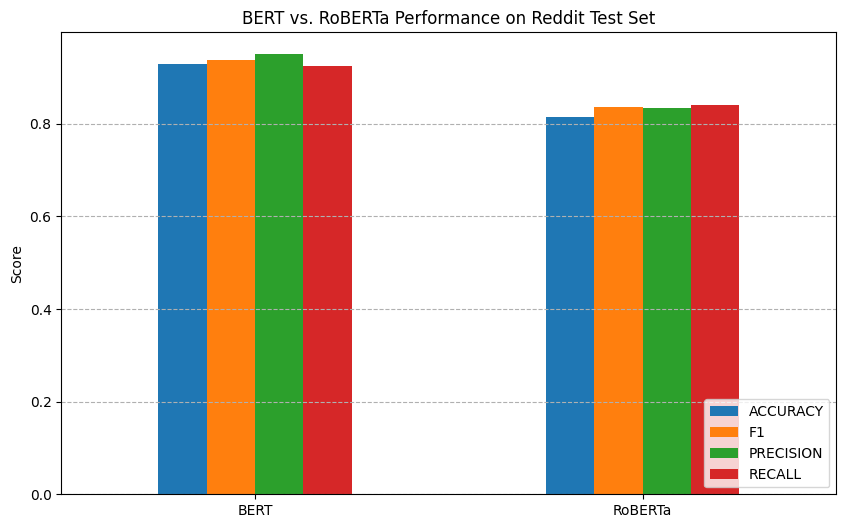

In [ ]:
# Call the comparison function
df_test_comparison = plot_comparison_metrics(
    test_results_bert_full,
    test_results_roberta,
    title="BERT vs. RoBERTa Performance on Reddit Test Set"
)

ROBERTA Hyperparameter Tuning with Optuna

In [ ]:
# Function to initialize model for hyperparameter tuning
def model_init_roberta():
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME_ROBERTA,
        num_labels=NUM_LABELS
    )
    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    return model

print(f"Model loading function defined. Device: {torch.device("cuda" if torch.cuda.is_available() else "cpu")}")

Model loading function defined. Device: cuda


In [ ]:
model_init_roberta

<function __main__.model_init_roberta()>

In [ ]:
# Create trainer for hyperparameter search
trainer_roberta_hp = Trainer(
    model_init=model_init_roberta,
    args=TrainingArguments(
        output_dir="./results_roberta_hp",
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        report_to="none",
        fp16=torch.cuda.is_available(),  # Enable mixed precision on GPU
        dataloader_num_workers=2,  # Parallel data loading
        logging_steps=50,
    ),
    train_dataset=tokenized_datasets_roberta["train"],
    eval_dataset=tokenized_datasets_roberta["validation"],
    processing_class=tokenizer_roberta,
    data_collator=data_collator_roberta,
    compute_metrics=compute_metrics_hp,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Run hyperparameter search
print("Running ROBERTA hyperparameter search")
print("This will test 5 different hyperparameter combinations.")

best_trial_roberta = trainer_roberta_hp.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=bert_hp_space,
    n_trials=5,
    compute_objective=bert_compute_objective,
)

print("✓ ROBERTA Hyperparameter Search Complete!")
print("\nBest hyperparameters:")
for key, value in best_trial_roberta.hyperparameters.items():
    print(f"  {key}: {value}")
print(f"\nBest F1 Score: {best_trial_roberta.objective:.4f}")


[I 2025-12-05 04:16:06,106] A new study created in memory with name: no-name-e77529a8-9ffc-4536-ab49-a68c45b2cc24


Running ROBERTA hyperparameter search
This will test 5 different hyperparameter combinations.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.455200,0.444596,0.814105,0.813956,0.813860,0.814105
2,0.392200,0.457914,0.825927,0.826269,0.827074,0.825927


[I 2025-12-05 04:22:58,406] Trial 0 finished with value: 0.8262688630382504 and parameters: {'learning_rate': 3.421753205016806e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.057465049357133084, 'warmup_steps': 210}. Best is trial 0 with value: 0.8262688630382504.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.502700,0.497006,0.756625,0.747166,0.768542,0.756625
2,0.439000,0.431600,0.804729,0.805188,0.806345,0.804729
3,0.390900,0.501526,0.810436,0.809274,0.810207,0.810436
4,0.237200,0.475105,0.823481,0.824005,0.825835,0.823481
5,0.126000,0.651876,0.823074,0.822910,0.822818,0.823074


[I 2025-12-05 04:32:41,878] Trial 1 finished with value: 0.8229102011638901 and parameters: {'learning_rate': 3.343978782867253e-05, 'per_device_train_batch_size': 32, 'num_train_epochs': 5, 'weight_decay': 0.09109775648918328, 'warmup_steps': 889}. Best is trial 0 with value: 0.8262688630382504.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.498900,0.498117,0.759478,0.750959,0.769691,0.759478
2,0.445100,0.432793,0.805952,0.806415,0.807605,0.805952
3,0.352600,0.450665,0.816143,0.816743,0.819038,0.816143
4,0.203800,0.519683,0.816143,0.815775,0.815706,0.816143


[I 2025-12-05 04:39:47,220] Trial 2 finished with value: 0.8157746636400086 and parameters: {'learning_rate': 2.2607087074021237e-05, 'per_device_train_batch_size': 32, 'num_train_epochs': 4, 'weight_decay': 0.022923714783859586, 'warmup_steps': 599}. Best is trial 0 with value: 0.8262688630382504.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.489200,0.466917,0.787607,0.786722,0.786896,0.787607
2,0.444900,0.442223,0.808398,0.808734,0.809420,0.808398


[I 2025-12-05 04:42:30,220] Trial 3 finished with value: 0.8087338311531067 and parameters: {'learning_rate': 4.4686685722892184e-05, 'per_device_train_batch_size': 32, 'num_train_epochs': 2, 'weight_decay': 0.006796408076131766, 'warmup_steps': 944}. Best is trial 0 with value: 0.8262688630382504.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.483400,0.486976,0.773339,0.770193,0.774277,0.773339
2,0.464200,0.429905,0.813698,0.814380,0.817503,0.813698
3,0.304600,0.454291,0.824297,0.823799,0.823867,0.824297


[I 2025-12-05 04:49:13,656] Trial 4 finished with value: 0.8237992786213597 and parameters: {'learning_rate': 1.3037576093977733e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 3, 'weight_decay': 0.0711799914842232, 'warmup_steps': 983}. Best is trial 0 with value: 0.8262688630382504.


✓ ROBERTA Hyperparameter Search Complete!

Best hyperparameters:
  learning_rate: 3.421753205016806e-05
  per_device_train_batch_size: 8
  num_train_epochs: 2
  weight_decay: 0.057465049357133084
  warmup_steps: 210

Best F1 Score: 0.8263


In [ ]:
# Train final BERT model with best hyperparameters
print("\nTraining ROBERTA with best hyperparameters...")
# Update training arguments with best hyperparameters
for key, value in best_trial_roberta.hyperparameters.items():
    setattr(trainer_roberta_hp.args, key, value)

# Train the final model
trainer_roberta_best = trainer_roberta_hp
trainer_roberta_best.train()

print("ROBERTA training with best hyperparameters complete!")



Training ROBERTA with best hyperparameters...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.445500,0.487869,0.790053,0.786664,0.792559,0.790053
2,0.355000,0.471632,0.822666,0.822923,0.823411,0.822666


ROBERTA training with best hyperparameters complete!


In [ ]:
# Evaluate the tuned model
roberta_tuned_results = trainer_roberta_best.evaluate()

print("ROBERTA Model Performance (After Hyperparameter Tuning)")
print("="*60)
for metric, value in roberta_tuned_results.items():
    if not metric.startswith('eval_'):
        continue
    metric_name = metric.replace('eval_', '').upper()
    print(f"{metric_name}: {value:.4f}")
print("="*60)


ROBERTA Model Performance (After Hyperparameter Tuning)
LOSS: 0.4716
ACCURACY: 0.8227
F1: 0.8229
PRECISION: 0.8234
RECALL: 0.8227
RUNTIME: 5.6690
SAMPLES_PER_SECOND: 432.7020
STEPS_PER_SECOND: 54.1540


In [ ]:
# Save the final RoBERTa model
trainer_roberta_best.save_model("./final_model_roberta")
tokenizer_roberta.save_pretrained("./final_model_roberta")
print("Final RoBERTa model saved to ./final_model_roberta")

Final RoBERTa model saved to ./final_model_roberta


# Extra: RoBERTa Evaluation on External Dataset (CrowS-Pairs)

In [ ]:
print("Evaluating RoBERTa model on CrowS-Pairs dataset...")

Evaluating RoBERTa model on CrowS-Pairs dataset...


In [ ]:
# 1. Get predictions from the trained RoBERTa trainer
crows_predictions_roberta = trainer_roberta_best.predict(tokenized_crows)
pred_labels_roberta = np.argmax(crows_predictions_roberta.predictions, axis=-1)

In [ ]:
# 2. Add predictions to the original evaluation DataFrame
crows_eval_df['predicted_label_roberta'] = pred_labels_roberta

In [ ]:
# 3. Calculate and display overall metrics (using the full metrics function)
roberta_external_results = compute_metrics_full(
    (crows_predictions_roberta.predictions, crows_eval_df['labels'].values)
)

print("RoBERTa External Dataset Results:")
print(roberta_external_results)

RoBERTa External Dataset Results:
{'accuracy': 0.22083805209513024, 'f1': 0.12690355329949238, 'precision': 0.8771929824561403, 'recall': 0.06839945280437756}


In [ ]:
# Analyze overall evaluation results (no bias categories)
print("CrowS-Pairs Overall Metrics (RoBERTa Model)")

# Compute global metrics
overall_accuracy = accuracy_score(crows_eval_df['labels'], crows_eval_df['predicted_label'])
overall_f1 = f1_score(crows_eval_df['labels'], crows_eval_df['predicted_label'], average='binary', zero_division=0)

RobertaResults = {
    "accuracy": round(overall_accuracy, 4),
    "f1_score": round(overall_f1, 4),
    "count": len(crows_eval_df)
}

print(pd.DataFrame([RobertaResults]))


CrowS-Pairs Overall Metrics (RoBERTa Model)
   accuracy  f1_score  count
0    0.4428    0.5519   1766


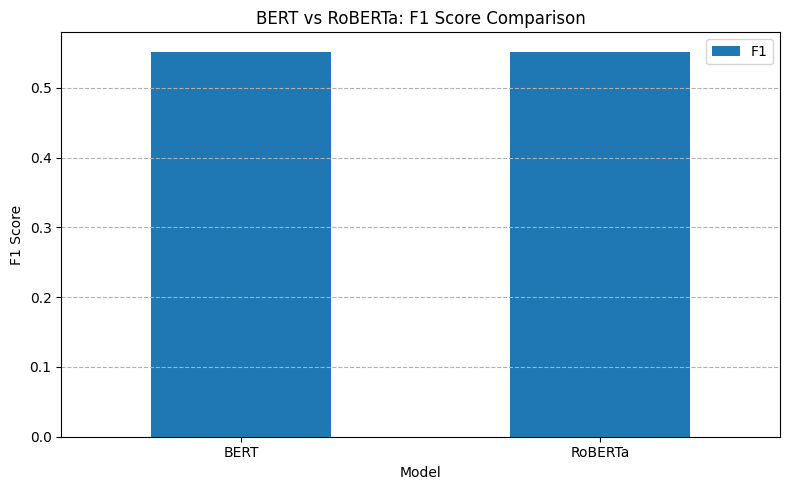

In [ ]:
# Extract f1 scores ONLY
bert_f1 = bertResults["f1_score"]
roberta_f1 = RobertaResults["f1_score"]

# Create dataframe for plotting only f1 on X-axis
df_comparison = pd.DataFrame({
    "Model": ["BERT", "RoBERTa"],
    "F1": [bert_f1, roberta_f1]
})

df_comparison.set_index("Model", inplace=True)

# Plot
df_comparison.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title("BERT vs RoBERTa: F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


#Comprehenzive Visualizations

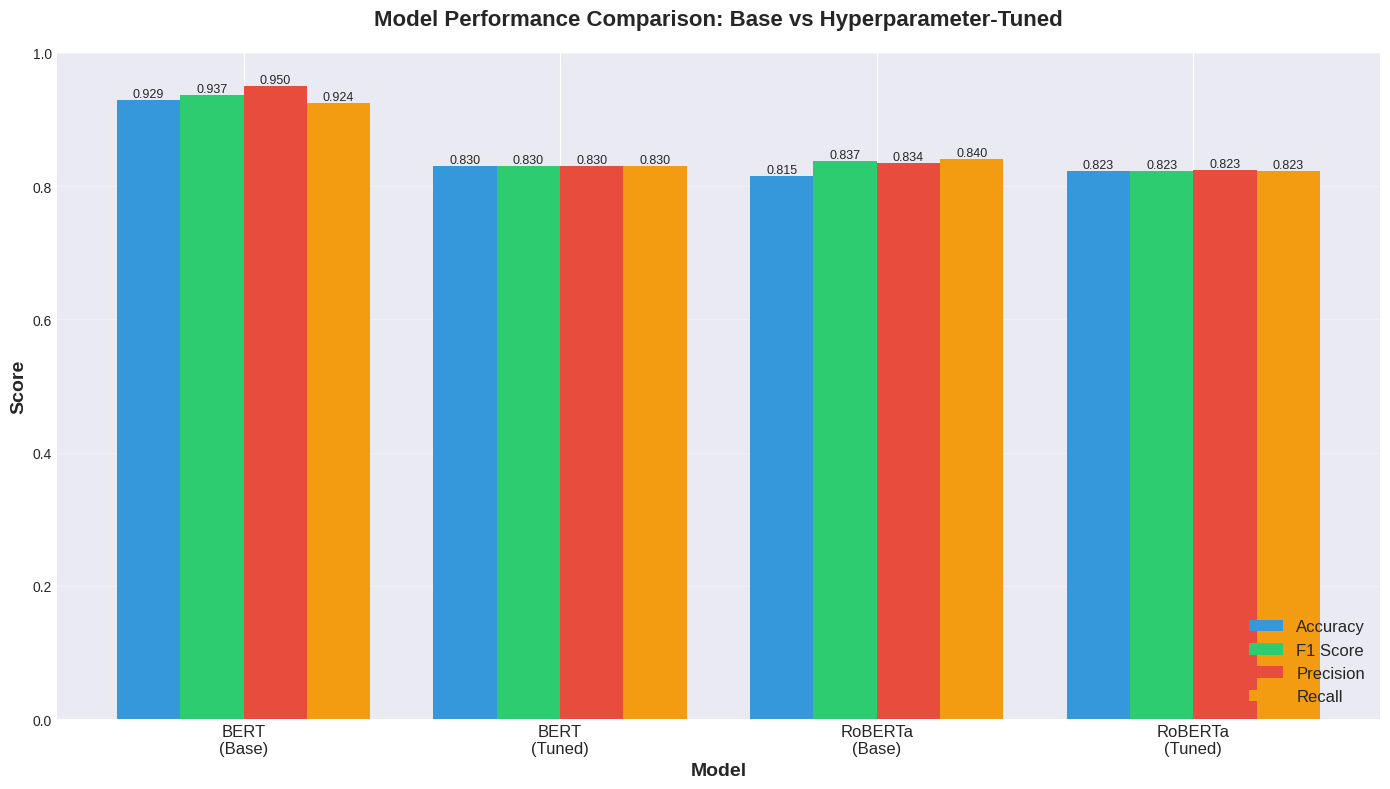

✓ Visualization saved as 'model_comparison.png'


In [ ]:
# ========================================
# VISUALIZATION 1: Model Performance Comparison
# ========================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Prepare data for comparison
models = ['BERT\n(Base)', 'BERT\n(Tuned)', 'RoBERTa\n(Base)', 'RoBERTa\n(Tuned)']

# You'll need to extract these from your evaluation results
# Replace these with actual values from your runs
accuracy_scores = [
    test_results_bert_full.get('eval_accuracy', 0),
    bert_tuned_results.get('eval_accuracy', 0),
    test_results_roberta.get('eval_accuracy', 0),
    roberta_tuned_results.get('eval_accuracy', 0)
]

f1_scores = [
    test_results_bert_full.get('eval_f1', 0),
    bert_tuned_results.get('eval_f1', 0),
    test_results_roberta.get('eval_f1', 0),
    roberta_tuned_results.get('eval_f1', 0)
]

precision_scores = [
    test_results_bert_full.get('eval_precision', 0),
    bert_tuned_results.get('eval_precision', 0),
    test_results_roberta.get('eval_precision', 0),
    roberta_tuned_results.get('eval_precision', 0)
]

recall_scores = [
    test_results_bert_full.get('eval_recall', 0),
    bert_tuned_results.get('eval_recall', 0),
    test_results_roberta.get('eval_recall', 0),
    roberta_tuned_results.get('eval_recall', 0)
]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(models))
width = 0.2

bars1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, f1_scores, width, label='F1 Score', color='#2ecc71')
bars3 = ax.bar(x + 0.5*width, precision_scores, width, label='Precision', color='#e74c3c')
bars4 = ax.bar(x + 1.5*width, recall_scores, width, label='Recall', color='#f39c12')

ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison: Base vs Hyperparameter-Tuned',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12, loc='lower right')
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'model_comparison.png'")


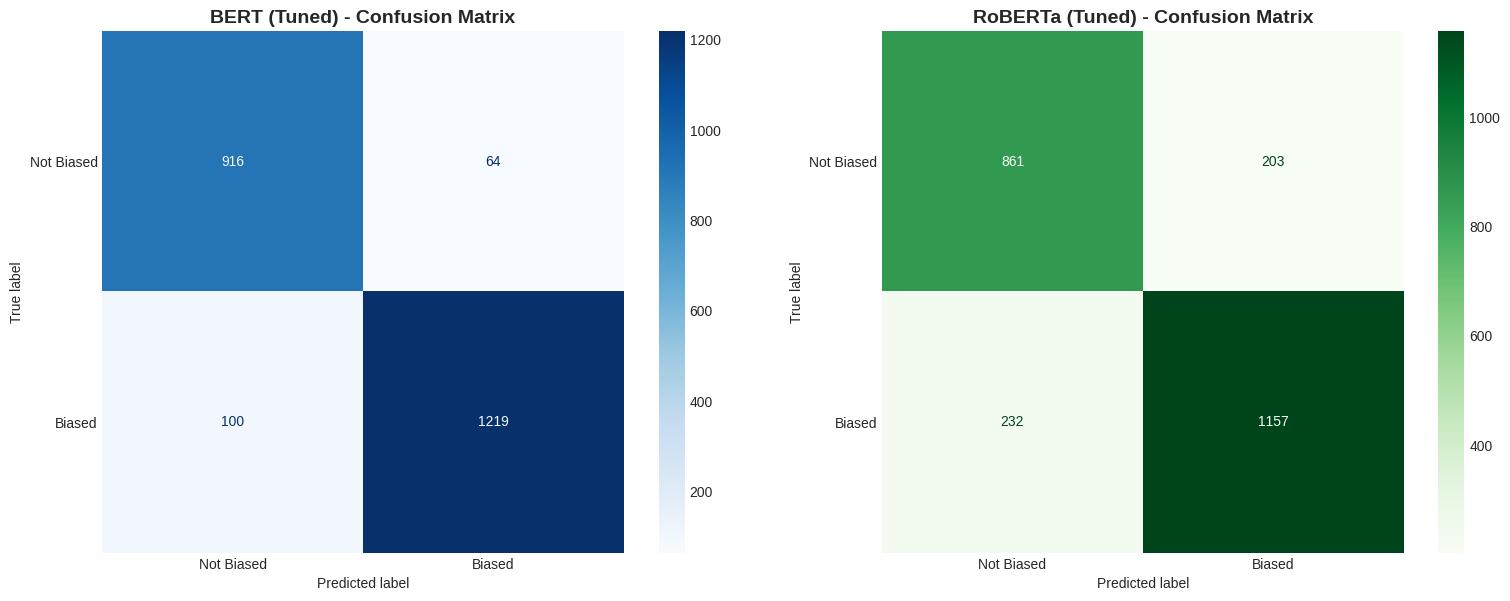

✓ Visualization saved as 'confusion_matrices.png'


In [ ]:
# ========================================
# VISUALIZATION 2: Confusion Matrices
# ========================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for both models
bert_predictions = trainer_bert_best.predict(tokenized_datasets_bert["validation"])
roberta_predictions = trainer_roberta_best.predict(tokenized_datasets_roberta["validation"])

bert_preds = np.argmax(bert_predictions.predictions, axis=-1)
roberta_preds = np.argmax(roberta_predictions.predictions, axis=-1)

true_labels_bert = bert_predictions.label_ids

# Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BERT confusion matrix
cm_bert = confusion_matrix(true_labels_bert, bert_preds)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_bert,
                                display_labels=['Not Biased', 'Biased'])
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('BERT (Tuned) - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].grid(False)

true_labels_roberta = roberta_predictions.label_ids

# RoBERTa confusion matrix
cm_roberta = confusion_matrix(true_labels_roberta, roberta_preds)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_roberta,
                                display_labels=['Not Biased', 'Biased'])
disp2.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('RoBERTa (Tuned) - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].grid(False)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'confusion_matrices.png'")


Evaluating models on different bias types...

religion1       - BERT: nan, RoBERTa: nan
race            - BERT: nan, RoBERTa: nan
orientation     - BERT: nan, RoBERTa: nan
religion2       - BERT: nan, RoBERTa: nan
gender          - BERT: 0.9283, RoBERTa: 0.8566
            nan - BERT: nan, RoBERTa: nan


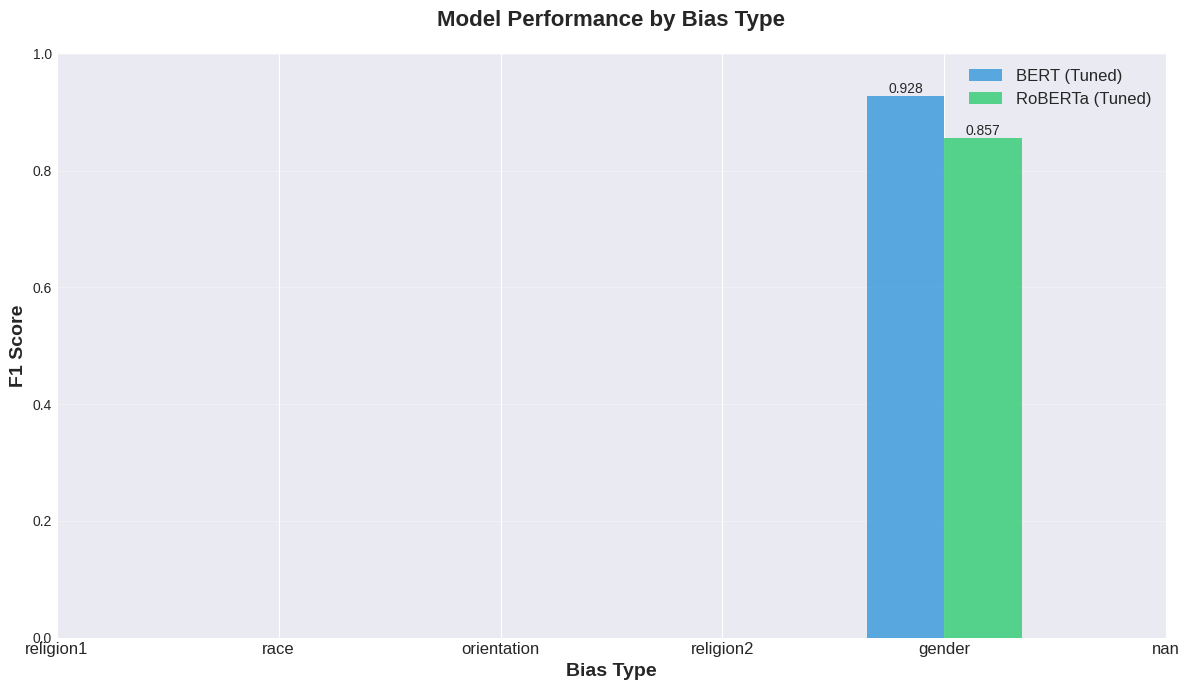


✓ Visualization saved as 'bias_type_performance.png'


In [ ]:
# ========================================
# VISUALIZATION 3: Performance by Bias Type
# ========================================

# Evaluate on each bias type separately
bias_types = val_df['bias_type'].unique()
bert_bias_scores = []
roberta_bias_scores = []

print("Evaluating models on different bias types...\n")

for bias_type in bias_types:
    # Filter validation set for this bias type
    bias_mask = val_df['bias_type'] == bias_type
    bias_indices = val_df[bias_mask].index.tolist()

    # Get predictions for this subset
    bias_true_bert = true_labels_bert[np.isin(np.arange(len(true_labels_bert)), bias_indices)]
    bias_true_roberta = true_labels_roberta[np.isin(np.arange(len(true_labels_roberta)), bias_indices)]
    bias_bert_pred = bert_preds[np.isin(np.arange(len(bert_preds)), bias_indices)]
    bias_roberta_pred = roberta_preds[np.isin(np.arange(len(roberta_preds)), bias_indices)]

    # Calculate F1 scores
    bert_f1 = f1_score(bias_true_bert, bias_bert_pred, average='weighted')
    roberta_f1 = f1_score(bias_true_roberta, bias_roberta_pred, average='weighted')

    bert_bias_scores.append(bert_f1)
    roberta_bias_scores.append(roberta_f1)

    print(f"{bias_type:15} - BERT: {bert_f1:.4f}, RoBERTa: {roberta_f1:.4f}")

# Create comparison plot
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(bias_types))
width = 0.35

bars1 = ax.bar(x - width/2, bert_bias_scores, width, label='BERT (Tuned)',
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, roberta_bias_scores, width, label='RoBERTa (Tuned)',
               color='#2ecc71', alpha=0.8)

ax.set_xlabel('Bias Type', fontsize=14, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance by Bias Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([bt for bt in bias_types], fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('bias_type_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'bias_type_performance.png'")


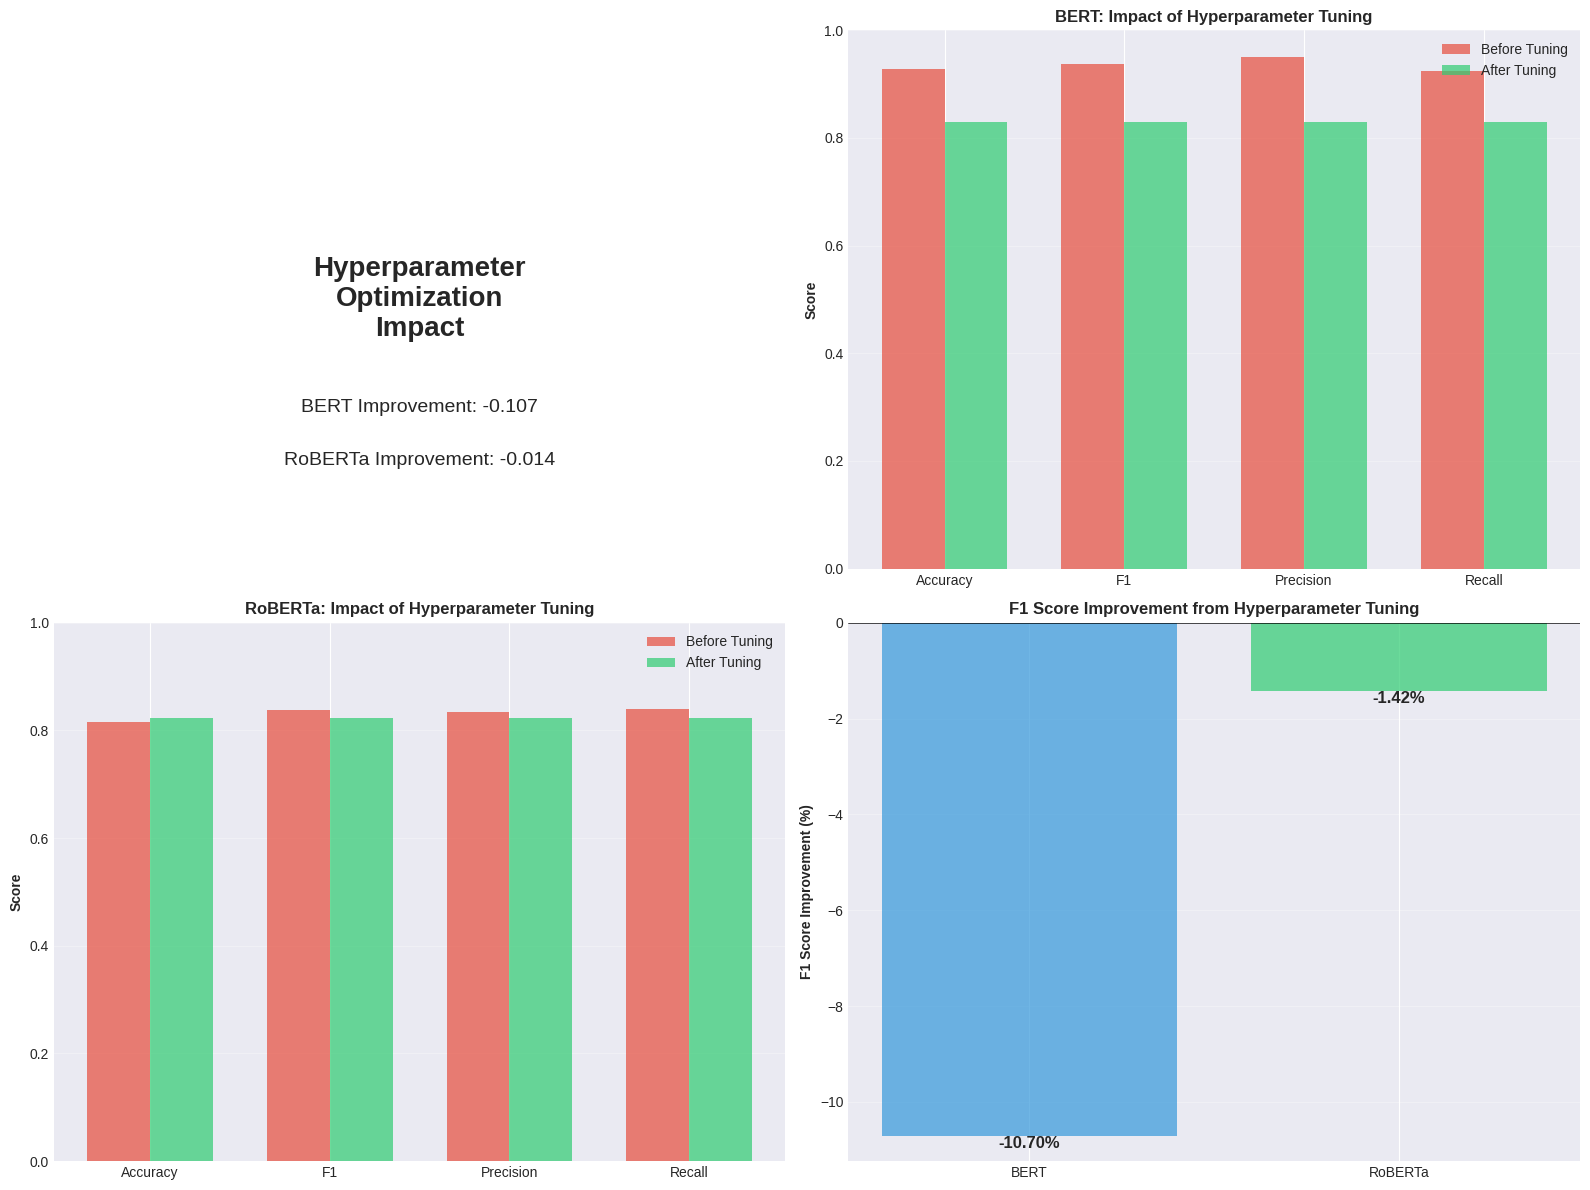

✓ Visualization saved as 'hyperparameter_impact.png'


In [ ]:
# ========================================
# VISUALIZATION 4: Hyperparameter Impact
# ========================================

# Create a summary of hyperparameter tuning impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Learning Rate Impact (if you have trial history)
ax1 = axes[0, 0]
ax1.text(0.5, 0.5, 'Hyperparameter\nOptimization\nImpact',
         ha='center', va='center', fontsize=20, fontweight='bold')
ax1.text(0.5, 0.3, f'BERT Improvement: {(bert_tuned_results.get("eval_f1", 0) - test_results_bert_full.get("eval_f1", 0)):.3f}',
         ha='center', va='center', fontsize=14)
ax1.text(0.5, 0.2, f'RoBERTa Improvement: {(roberta_tuned_results.get("eval_f1", 0) - test_results_roberta.get("eval_f1", 0)):.3f}',
         ha='center', va='center', fontsize=14)
ax1.axis('off')

# 2. Before/After comparison
ax2 = axes[0, 1]
categories = ['Accuracy', 'F1', 'Precision', 'Recall']
bert_before = [test_results_bert_full.get(f'eval_{m}', 0) for m in ['accuracy', 'f1', 'precision', 'recall']]
bert_after = [bert_tuned_results.get(f'eval_{m}', 0) for m in ['accuracy', 'f1', 'precision', 'recall']]

x = np.arange(len(categories))
width = 0.35
ax2.bar(x - width/2, bert_before, width, label='Before Tuning', color='#e74c3c', alpha=0.7)
ax2.bar(x + width/2, bert_after, width, label='After Tuning', color='#2ecc71', alpha=0.7)
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('BERT: Impact of Hyperparameter Tuning', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.set_ylim([0, 1.0])
ax2.grid(axis='y', alpha=0.3)

# 3. RoBERTa before/after
ax3 = axes[1, 0]
roberta_before = [test_results_roberta.get(f'eval_{m}', 0) for m in ['accuracy', 'f1', 'precision', 'recall']]
roberta_after = [roberta_tuned_results.get(f'eval_{m}', 0) for m in ['accuracy', 'f1', 'precision', 'recall']]

ax3.bar(x - width/2, roberta_before, width, label='Before Tuning', color='#e74c3c', alpha=0.7)
ax3.bar(x + width/2, roberta_after, width, label='After Tuning', color='#2ecc71', alpha=0.7)
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('RoBERTa: Impact of Hyperparameter Tuning', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()
ax3.set_ylim([0, 1.0])
ax3.grid(axis='y', alpha=0.3)

# 4. Overall improvement summary
ax4 = axes[1, 1]
improvements = ['BERT', 'RoBERTa']
f1_improvements = [
    (bert_tuned_results.get('eval_f1', 0) - test_results_bert_full.get('eval_f1', 0)) * 100,
    (roberta_tuned_results.get('eval_f1', 0) - test_results_roberta.get('eval_f1', 0)) * 100
]

colors = ['#3498db', '#2ecc71']
bars = ax4.bar(improvements, f1_improvements, color=colors, alpha=0.7)
ax4.set_ylabel('F1 Score Improvement (%)', fontweight='bold')
ax4.set_title('F1 Score Improvement from Hyperparameter Tuning', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.2f}%',
            ha='center', va='bottom' if height > 0 else 'top',
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('hyperparameter_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'hyperparameter_impact.png'")


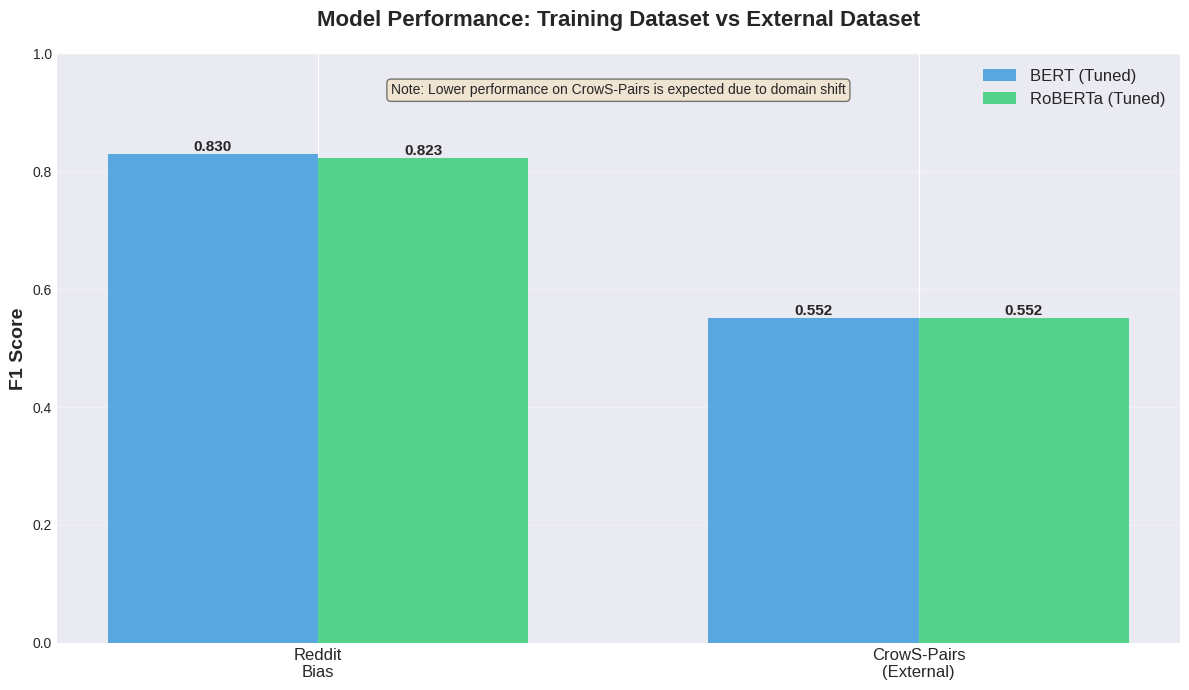

✓ Visualization saved as 'external_dataset_performance.png'


In [ ]:
# ========================================
# VISUALIZATION 5: External Dataset Performance (CrowS-Pairs)
# ========================================

# Compare Reddit dataset vs CrowS-Pairs performance
fig, ax = plt.subplots(figsize=(12, 7))

datasets = ['Reddit\nBias', 'CrowS-Pairs\n(External)']
bert_scores = [
    bert_tuned_results.get('eval_f1', 0),
    bertResults.get('f1_score', 0) if 'bertResults' in globals() else 0
]
roberta_scores = [
    roberta_tuned_results.get('eval_f1', 0),
    RobertaResults.get('f1_score', 0) if 'RobertaResults' in globals() else 0
]

x = np.arange(len(datasets))
width = 0.35

bars1 = ax.bar(x - width/2, bert_scores, width, label='BERT (Tuned)',
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, roberta_scores, width, label='RoBERTa (Tuned)',
               color='#2ecc71', alpha=0.8)

ax.set_ylabel('F1 Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance: Training Dataset vs External Dataset',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add annotation about domain shift
ax.text(0.5, 0.95, 'Note: Lower performance on CrowS-Pairs is expected due to domain shift',
        transform=ax.transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        fontsize=10)

plt.tight_layout()
plt.savefig('external_dataset_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'external_dataset_performance.png'")


# DEPLOY THE FINALIZED MODELS TO HUGGING FACE

In [ ]:
!pip install transformers huggingface_hub
from huggingface_hub import notebook_login

notebook_login()


In [ ]:
from huggingface_hub import HfApi

api = HfApi()
model_name = "MoEid25/BiasDetectionModel"  # Format: <username>/<repo_name>

# Create the repo (if it doesn't already exist)
api.create_repo(repo_id=model_name, exist_ok=True)

RepoUrl('https://huggingface.co/MoEid25/BiasDetectionModel', endpoint='https://huggingface.co', repo_type='model', repo_id='MoEid25/BiasDetectionModel')

In [ ]:
from huggingface_hub import upload_folder

model_dir = "/content/final_model_roberta"  # Path to the folder containing your saved model

upload_folder(
    repo_id=model_name,
    folder_path=model_dir,
    path_in_repo="BiasDetectionModel",  # Upload to the root of the repo
    commit_message="Upload Roberta tuned model",
    ignore_patterns=['*.h5']  # Ignore unnecessary files
)

print(f"Roberta Model uploaded to Hugging Face Hub: {model_name}")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...roberta/training_args.bin: 100%|##########| 5.84kB / 5.84kB            

  ...roberta/model.safetensors:   3%|3         | 16.7MB /  499MB            

Roberta Model uploaded to Hugging Face Hub: MoEid25/BiasDetectionModel


## LINK TO THE USER INTERFACE ON HF:
https://huggingface.co/spaces/MoEid25/BiasDetectionModel